# Daten glätten

## Beispiel: Weißes Rauschen

In Anlehnung an *weißes Licht* wird ein Rauschsignal als *weiß* bezeichnet, wenn kein Frequenzanteil bevorzugt ist.

In [19]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_points = 50

rng = np.random.default_rng(42)
rng2 = np.random.default_rng(41)



randvals = rng.normal(0,2,data_points) # normal distribution: mean, std, no_of_points

In [20]:
randvals

array([ 0.60943416, -2.07996821,  1.50090239,  1.88112943, -3.90207038,
       -2.60435901,  0.25568081, -0.63248518, -0.03360232, -1.70608786,
        1.75879595,  1.55558387,  0.1320614 ,  2.25448241,  0.93501868,
       -1.71858493,  0.73750157, -1.9177652 ,  1.7569006 , -0.09985182,
       -0.36972473, -1.36185909,  2.44508268, -0.30905896, -0.85665564,
       -0.7042671 ,  1.06461837,  0.73088813,  0.82546522,  0.86164201,
        4.2832952 , -0.81283003, -1.02448546, -1.62754546,  1.23195885,
        2.25794459, -0.22789492, -1.68031295, -1.64896243,  1.30118558,
        1.48650834,  1.08630854, -1.33101941,  0.46432265,  0.23337162,
        0.43737719,  1.74285756,  0.4471911 ,  1.35782713,  0.13515814])

0.18242206098602265


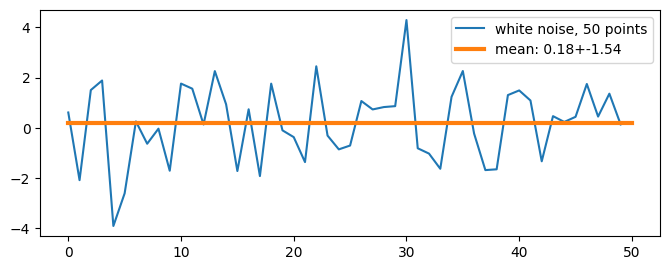

In [21]:
ts = pd.Series(randvals)
ts_mean = ts.mean()
print(ts_mean)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(ts, label = f'white noise, {data_points} points')
plt.plot((0,data_points), (ts_mean, ts_mean), lw=3, label = f"mean: {ts_mean:3.2f}+-{ts.std():3.2f}")
plt.legend()
plt.show()

## Gruppieren und aggregieren

<Axes: xlabel='date'>

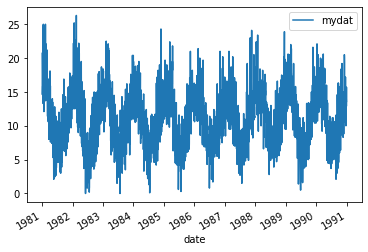

In [25]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn1 = 'data/demo_sun.csv' # sunspots
fn2 = 'data/demo_exi.csv' # stock
fn3 = 'data/demo_co2.csv' # co2
fn4 = 'data/demo_tdaily.csv' # temperatures

fn2 = fn4

df = pd.read_csv(fn2, parse_dates=['date'], index_col='date')
df.plot()

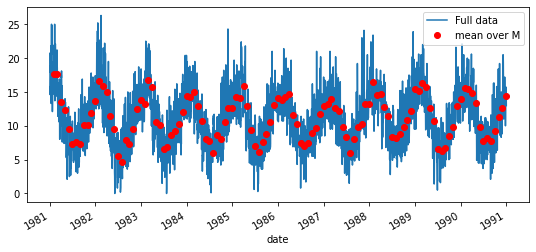

In [27]:
#meth = 'max'
meth = 'mean'
#period = 'Y'
period = 'M'
ax = df.plot(figsize=(9,4))
dg = df.resample(period).agg(meth)
dg.plot(style='o', ax = ax, color='red')
ax.legend(["Full data", f"{meth} over {period}"]);


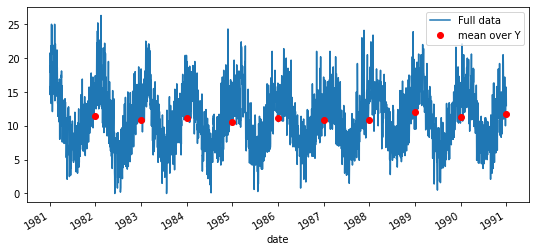

In [28]:
#meth = 'max'
meth = 'mean'
period = 'Y'
#period = 'M'
ax = df.plot(figsize=(9,4))
dg = df.resample(period).agg(meth)
dg.plot(style='o', ax = ax, color='red')
ax.legend(["Full data", f"{meth} over {period}"]);


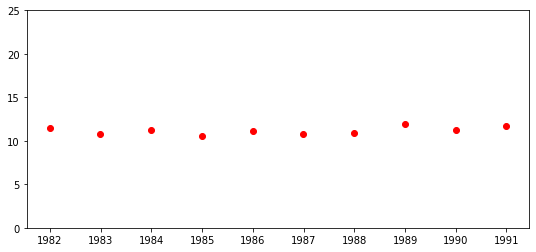

In [29]:
# just for demonstration: plotting via matplotlib -- the peferred method
plt.figure(figsize=(9,4))
plt.scatter(dg.index, dg.iloc[:,0], color='red')
plt.ylim(0,25)
plt.show()

## Glätten

### Moving Average



In [31]:
import sktime
sktime.__version__

'0.24.1'

<Axes: xlabel='date'>

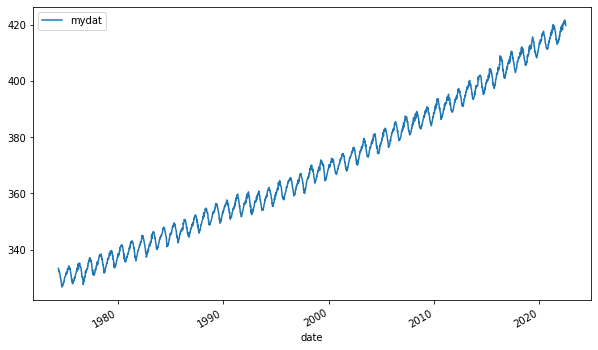

In [32]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn1 = 'data/demo_sun.csv'
fn2 = 'data/demo_exi.csv'
fn3 = 'data/demo_co2.csv'
fn4 = 'data/demo_tdaily.csv'

fn2 = fn3

df = pd.read_csv(fn2, parse_dates=['date'], index_col='date')


df.plot(figsize=(10,6))

In [40]:
#window_size = 100
window_size = 10


df['smooth'] = df.iloc[:,0].rolling(window_size, center=True).mean() #, closed='both').mean()

In [41]:
df

,mydat,smooth
date,,
1974-05-19,333.37,NaN
1974-05-26,332.95,NaN
1974-06-02,332.35,NaN
1974-06-09,332.20,NaN
1974-06-16,332.37,NaN
...,...,...
2022-06-05,421.30,420.861
2022-06-12,421.03,NaN
2022-06-19,420.87,NaN


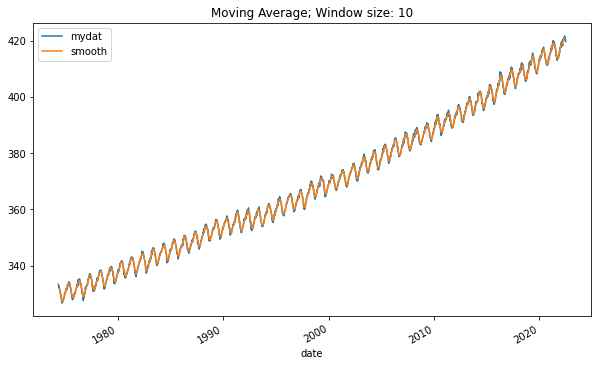

2494


In [42]:
ax = df.plot(figsize=(10,6))
ax.set_title(f'Moving Average; Window size: {window_size}')
# magnify
#plt.xlim('1990','1994')
#plt.ylim(350,370)
plt.show()
print(len(df))

In [54]:
#window_size = 100
window_size = 4
center = False # False
df['smooth'] = df.iloc[:,0].rolling(window_size, center=True, closed='both').mean()


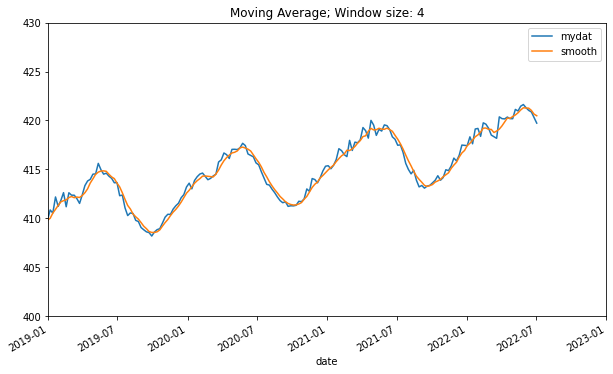

2494


In [55]:
ax = df.plot(figsize=(10,6))

ax.set_title(f'Moving Average; Window size: {window_size}')
# magnify
plt.xlim('2019','2023')
plt.ylim(400,430)
plt.show()
print(len(df))

### Kumulatives Glätten

<Axes: xlabel='date'>

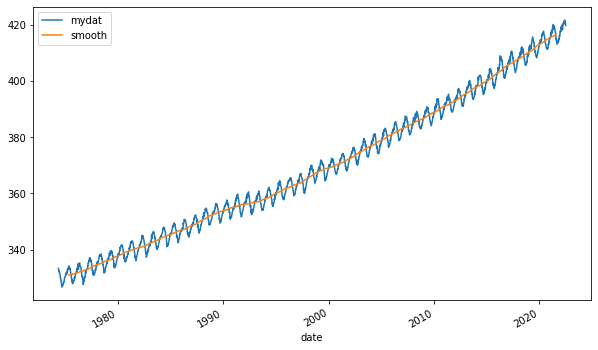

In [12]:
df.plot(figsize=(10,6))

2494


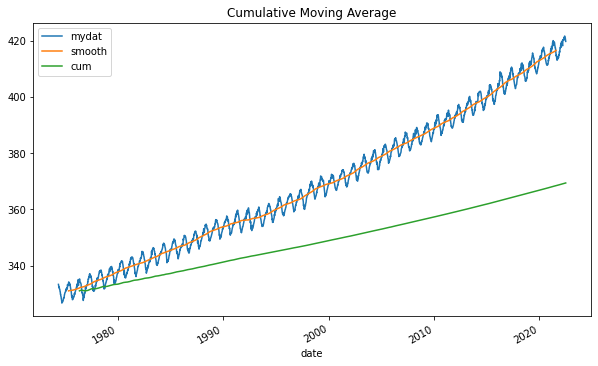

In [13]:
df['cum'] = df.iloc[:,0].expanding(min_periods=100).mean()

ax = df.plot(figsize=(10,6))
ax.set_title(f'Cumulative Moving Average')
# magnify 
#plt.axis([len(df)-50, len(df),50, 70])
plt.plot()
print(len(df))

### Exponentielles Glätten

Ansatz:

$$
y_{t}^{*}=\alpha \cdot y_{{t}}+(1-\alpha )\cdot y_{{t-1}}^{*}
$$

mit $\alpha$ = 0 ... 1

* $\alpha$ = 1: Vorhersage = aktuell gemessener Wert.
* $\alpha$ = 0: Vorhersagen aus der Vergangenheit werden unverändert übernommen.

Aus:

$$
y_{1}^{*}=\alpha y_{1}+(1-\alpha )y_{0}^{*}\;
$$

$$
y_{2}^{*}=\alpha y_{2}+(1-\alpha )y_{1}^{*}\;
$$

$$
y_{3}^{*}=\alpha y_{3}+(1-\alpha )y_{2}^{*}\;
$$

folgt:

$$
y_{t}^{*}=\alpha y_{t}+\alpha (1-\alpha )y_{{t-1}}+\alpha (1-\alpha )^{2}y_{{t-2}}+\dotsb +\alpha (1-\alpha )^{{t-1}}y_{1}+(1-\alpha )^{t}y_{0}^{*}
$$

Schwierigkeit: Exponentielle Glättung beginnt nicht bei $-\infty$, sondern bei einem Startwert $y_0$. 

Bei $\alpha = 0$ verharrt die Glättung bei $y_0$.

<Axes: xlabel='date'>

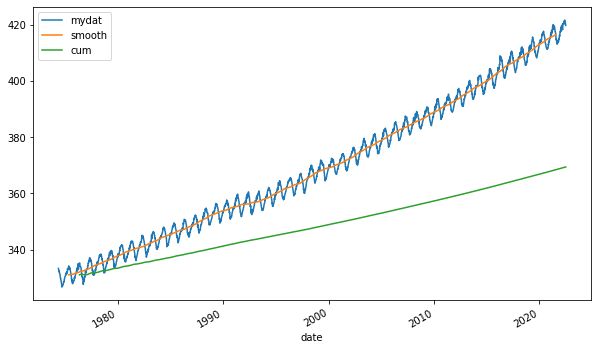

In [14]:
df.plot(figsize=(10,6))

In [56]:
df

,mydat,smooth
date,,
1974-05-19,333.37,NaN
1974-05-26,332.95,NaN
1974-06-02,332.35,332.7175
1974-06-09,332.20,332.6480
1974-06-16,332.37,332.3200
...,...,...
2022-06-05,421.30,421.2780
2022-06-12,421.03,421.2580
2022-06-19,420.87,421.0280


In [69]:
#alpha = 0.05 # data shift! Compare with rolling window
alpha = 0.000001

df['expm'] = df.iloc[:,0].ewm(alpha=alpha).mean()
df

,mydat,smooth,expm
date,,,
1974-05-19,333.37,NaN,333.370000
1974-05-26,332.95,NaN,333.160000
1974-06-02,332.35,332.7175,332.890000
1974-06-09,332.20,332.6480,332.717499
1974-06-16,332.37,332.3200,332.647999
...,...,...,...
2022-06-05,421.30,421.2780,369.350790
2022-06-12,421.03,421.2580,369.371562
2022-06-19,420.87,421.0280,369.392253


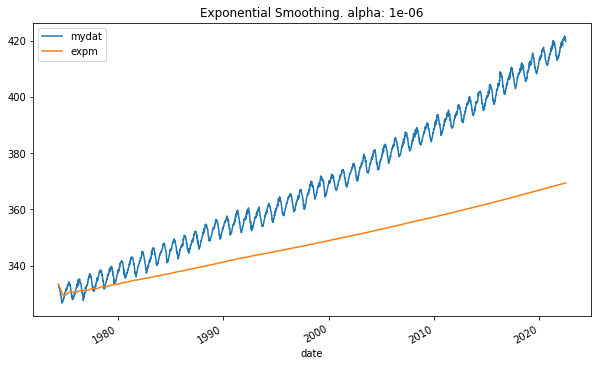

In [70]:
ax = df[['mydat', 'expm']].plot(figsize=(10,6))
ax.set_title(f'Exponential Smoothing. alpha: {alpha}')
# magnify 
#plt.axis([len(df)-50, len(df),50, 70])
#ax.set_xlim('2020', '2023')
#ax.set_ylim(410,422)
plt.show()

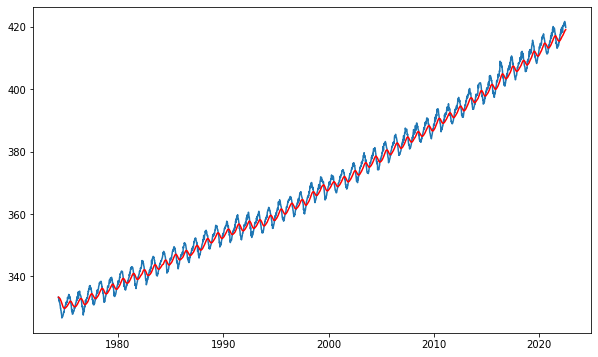

In [16]:
# exponential smoothing from scratch

alpha = 0.05

dg = df.copy()
dg.reset_index(inplace=True)
dg['ewm_c'] = dg['mydat']
dg['ewm'] = dg['mydat'].ewm(alpha=alpha, adjust=False).mean()

        
for index, row in dg.iterrows():
    #print(index, row['mydat'])
    if not index: #keep first value
        pass
        continue
    dg.loc[index, 'ewm_c'] = alpha * dg.loc[index, 'mydat'] + (1-alpha) * dg.loc[index-1, 'ewm_c']

#display(dg.head(10))

plt.figure(figsize=(10,6))
plt.plot(dg['date'], dg['mydat'])
plt.plot(dg['date'], dg['ewm_c'], color = 'red')
plt.show()
    
        

### Glätten mittels lokaler Regression

Arbeitsweise

LOESS /LOWESS:   locally (-weighted) scatterplot smoothing,

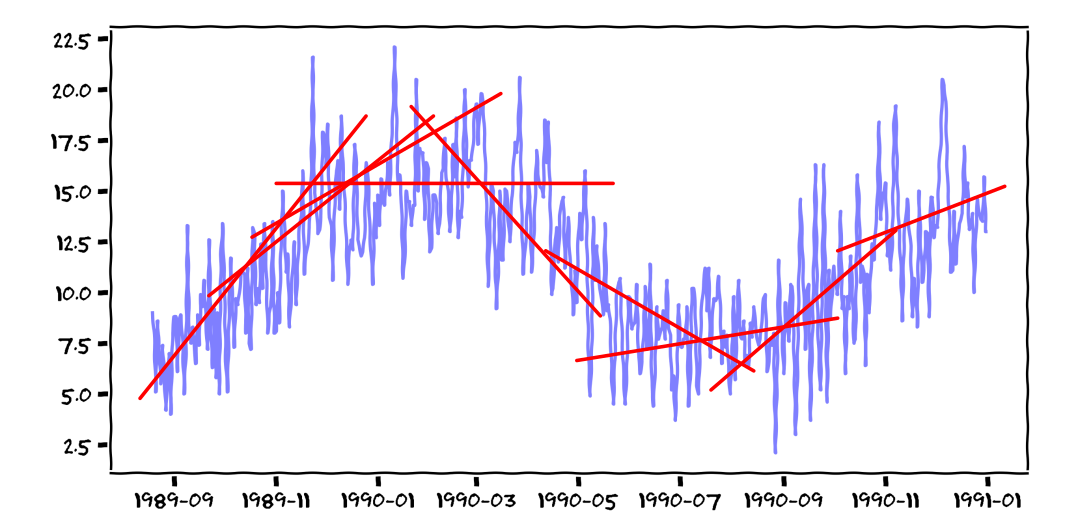

* Zunächst Vorgabe des Anteils der Datenpunkte, die  für eine Glättung herangezogen werden sollen.
* Punkte werden über Methode der nächsten Nachbarn (knn) identifiziert.
* Intervallpunkte werden gewichtet, typischerweise über kubische Wichtungsfunktion.
* Anschließend bestimmen der Regressionsgerade für jeden Punkt.

Beispiele für Wichtungsfunktionen: 

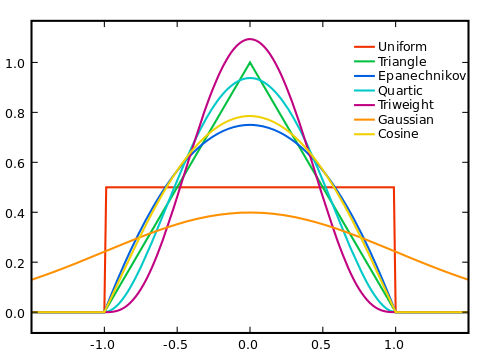


Ähnlich wie bei einem Fit (*Scatterplot*) sucht LO(W)ESS die y-Werte der Stützstellen selbst, anders als bei einem Fit auch die x-Werte.

* Vorteil: Man erhält geglättete Kurve, ohne Annahmen (*nonparametric*) hineinzustecken.
* Nachteil: Die geglätte Linie ist analytisch nicht zugänglich und kann nicht auf die Werte angewendet werden (eg. keine Anbleitung, kein Integra, kein Forecast)

### Umsetzung in Python

https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html


In [71]:
%reset -f

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

fn1 = 'data/demo_sun.csv'
fn2 = 'data/demo_exi.csv'
fn3 = 'data/demo_co2.csv'
fn4 = 'data/demo_tdaily.csv'

fn2 = fn1

df = pd.read_csv(fn2, parse_dates=['date'], index_col='date')


<Axes: xlabel='date'>

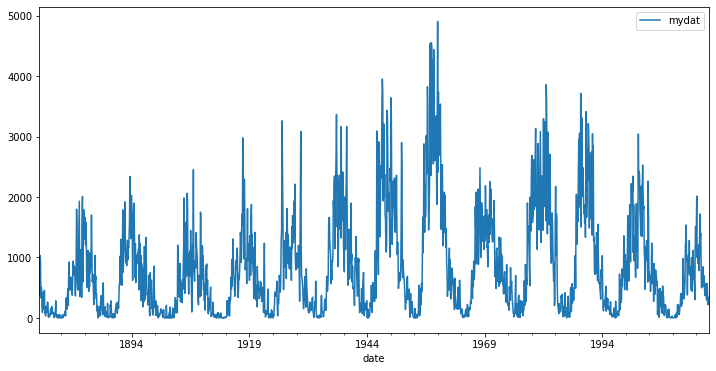

In [72]:
df.plot(figsize=(12, 6))

In [73]:
df['ym01'] = sm.nonparametric.lowess(df.iloc[:,0].to_numpy(), df.index.to_numpy(), 
                                   frac = 0.01)[:,1]
df['ym05'] = sm.nonparametric.lowess(df.iloc[:,0].to_numpy(), df.index.to_numpy(),  
                                   frac = 0.05)[:,1]
df['ym15'] = sm.nonparametric.lowess(endog = df.iloc[:,0].to_numpy(), exog = df.index.to_numpy(),
                                   frac = 0.15)[:,1]

In [81]:
df.iloc[:,0].to_numpy()

array([ 365.1,  415.2, 1033.5, ...,  335.1,  308.2,  341.6])

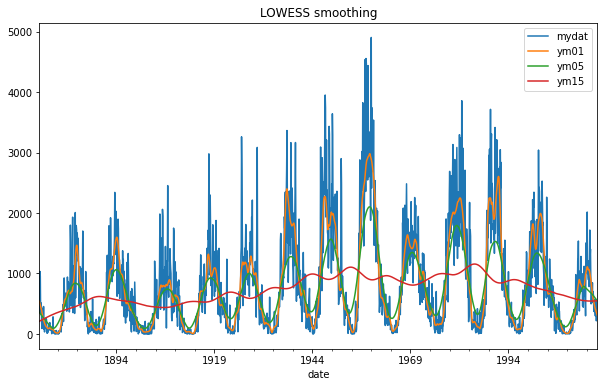

In [74]:
ax = df.plot(figsize=(10,6))
ax.set_title('LOWESS smoothing')
# magnify
#ax.set_xlim('1990','1994')
#plt.ylim(350,370)
plt.show()


In [78]:
df['ym01'] = sm.nonparametric.lowess(df.iloc[:,0], df.index, 
                                   frac = 0.01)[:,1]
df['ym05'] = sm.nonparametric.lowess(df.iloc[:,0], df.index,  
                                   frac = 0.05)[:,1]


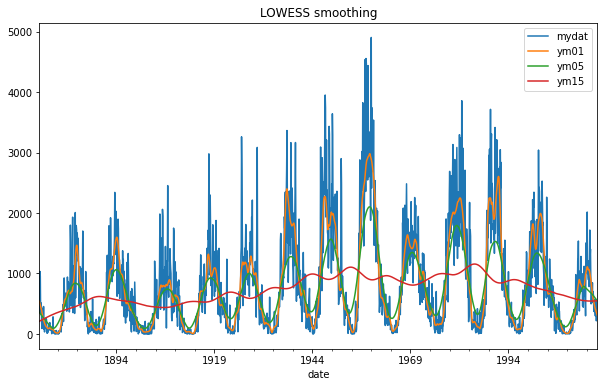

In [79]:
ax = df.plot(figsize=(10,6))
ax.set_title('LOWESS smoothing')
# magnify
#ax.set_xlim('1990','1994')
#plt.ylim(350,370)
plt.show()
